In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [3]:
# Load the cleaned dataset (from outlier removal step)
df = pd.read_csv("spotify_tracks_cleaned_IQR.csv")

# Check dataset shape and first few rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (58260, 22)


Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
4           5  01MVOl9KtVTNfFiBU9I7dc            Tyrone Wells   

             album_name            track_name  popularity  duration_ms  \
0                Comedy                Comedy          73       230666   
1      Ghost (Acoustic)      Ghost - Acoustic          55       149610   
2        To Begin Again        To Begin Again          57       210826   
3               Hold On               Hold On          82       198853   
4  Days I Will Remember  Days I Will Remember          58       214240   

   explicit  danceability  energy  ...  mode  speechiness  acousticness  \
0         0         0.676   0.461  ...     0       0.1430        0.0322   
1         0         0.420   0.166  ...     1       0.0763        0.9240   
2         0         0.438   0.359  ...     1       0.0557        0.2100   
3         0         0.618   0.443  ...     1       0.0526        0.4690   
4         0         0.688   0.481  ...     1       0.1050        0.2890   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0          0.000001    0.3580    0.715   87.917               4     acoustic   
1          0.000006    0.1010    0.267   77.489               4     acoustic   
2          0.000000    0.1170    0.120   76.332               4     acoustic   
3          0.000000    0.0829    0.167  119.949               4     acoustic   
4          0.000000    0.1890    0.666   98.017               4     acoustic   

   track_genre_encoded  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 22 columns]

In [4]:
# Exclude non-numeric and ID/categorical columns
exclude = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Select numeric columns excluding the ones above
numeric_features = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude]
print("Numeric columns to scale:\n", numeric_features)


Numeric columns to scale:
 ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']


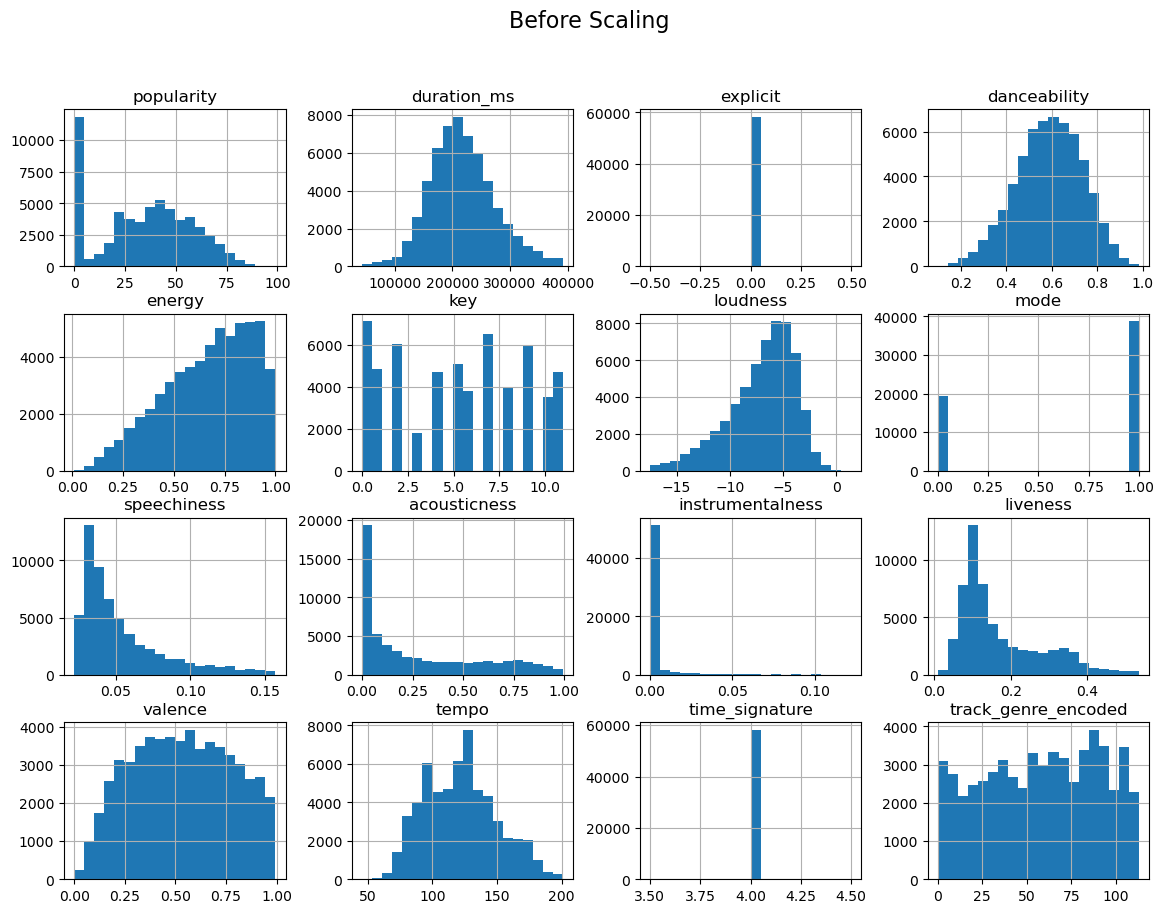

In [5]:
# Plot histograms of numeric features before scaling
df[numeric_features].hist(bins=20, figsize=(14,10))
plt.suptitle("Before Scaling", fontsize=16)
plt.show()


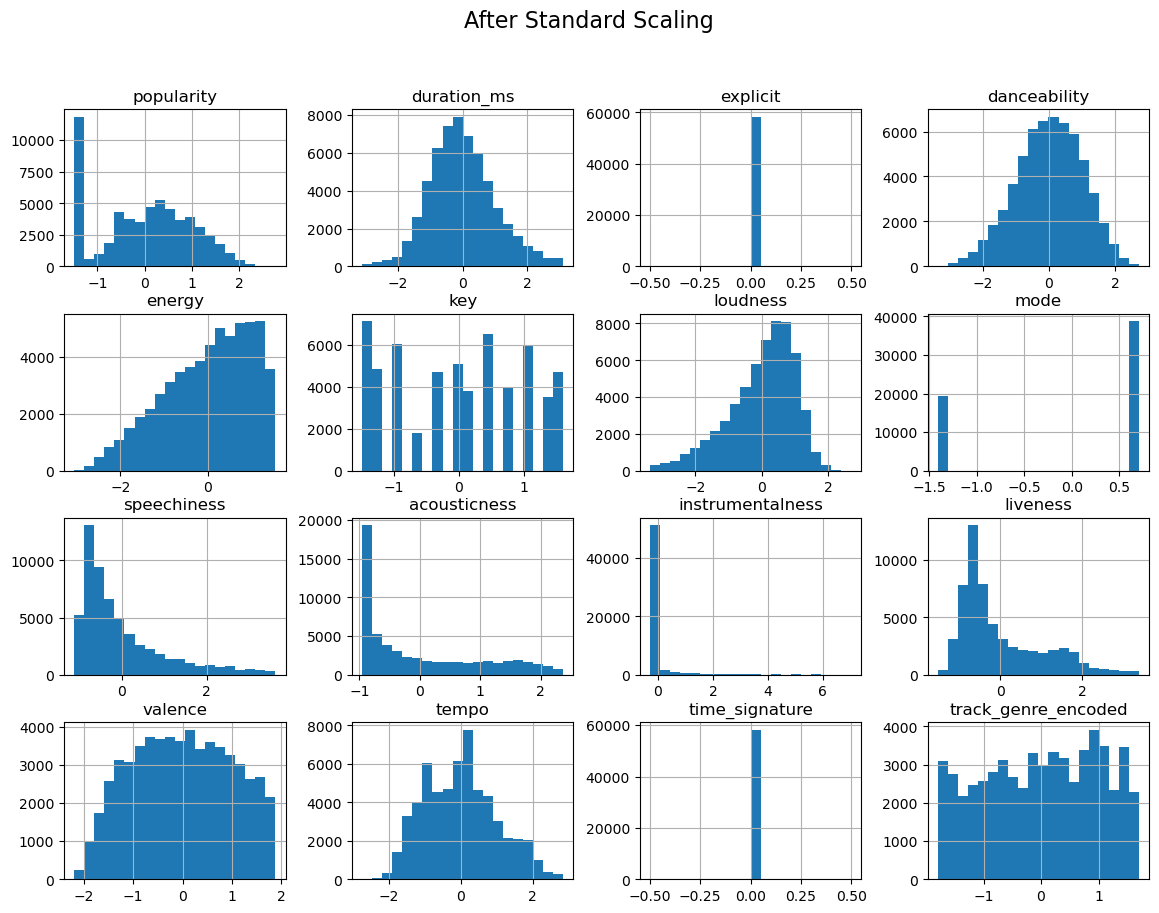

In [6]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the dataset to store scaled values
df_standard = df.copy()

# Scale numeric features
df_standard[numeric_features] = scaler.fit_transform(df[numeric_features])

# Plot histograms after scaling
df_standard[numeric_features].hist(bins=20, figsize=(14,10))
plt.suptitle("After Standard Scaling", fontsize=16)
plt.show()


In [7]:
# Check mean and standard deviation of scaled features
print("🔹 Standard Scaling: mean & std")
print(df_standard[numeric_features].agg(['mean','std']).round(2))


🔹 Standard Scaling: mean & std
      popularity  duration_ms  explicit  danceability  energy  key  loudness  \
mean         0.0         -0.0       0.0           0.0     0.0 -0.0      -0.0   
std          1.0          1.0       0.0           1.0     1.0  1.0       1.0   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
mean   0.0          0.0           0.0               0.0       0.0     -0.0   
std    1.0          1.0           1.0               1.0       1.0      1.0   

      tempo  time_signature  track_genre_encoded  
mean   -0.0             0.0                  0.0  
std     1.0             0.0                  1.0  


In [9]:
# Save the standard scaled dataset to a new CSV
df_standard.to_csv("spotify_tracks_scaled_standard.csv", index=False)
print("Standard scaled dataset saved as 'spotify_tracks_scaled_standard.csv'")


Standard scaled dataset saved as 'spotify_tracks_scaled_standard.csv'
